In [518]:
# NN-Tools
from numpy                 import array, linspace, meshgrid, vstack
from keras.models          import Sequential
from keras.layers          import Dense
from keras.initializers    import Constant, glorot_uniform, RandomUniform
from keras.losses          import categorical_crossentropy
from keras.optimizers      import Adam
from keras.utils           import to_categorical
from keras.datasets        import mnist
from keras.utils.vis_utils import model_to_dot
# Visualization
from IPython.display       import SVG
from IPython.display       import display

# Printing
from sympy                 import init_printing, Matrix
init_printing(use_latex=True)
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# $\forall$ Problems

In [519]:
weight_seed = 10

# Preparation for problems 1 and 3

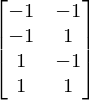

In [369]:
# XOR data set
X = array([[-1,-1],[-1,1],[1,-1],[1,1]])
display(Matrix(X))
Y = array([0,1,1,0])
display(Matrix(Y))

In [330]:
# Sample plot of classification space
xpoints = linspace(-2,2,20)
ypoints = linspace(-2,2,20)
xgrid, ygrid = meshgrid(xpoints,ypoints)
positions = vstack([xgrid.ravel(),ygrid.ravel()]).T

# Problem 1

In [331]:
layers            = 5
neurons_per_layer = 25

In [332]:
# # Multi-layer net with ReLU hidden layer
model = Sequential()
for _ in range(layers):
    model.add(Dense(units              = neurons_per_layer,
                    input_dim          = 2,
                    activation         = 'relu',
                    kernel_initializer = glorot_uniform(seed = weight_seed),
                    bias_initializer   = Constant(0.1)))
    
model.add(Dense(units      = 1,
                activation = 'sigmoid'))

model.compile(loss      = 'binary_crossentropy',
              optimizer = Adam(),
              metrics   = ['accuracy'])

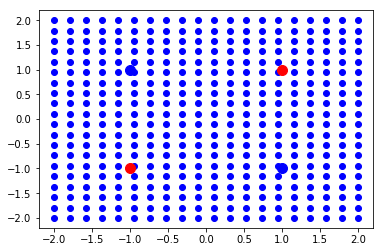

In [334]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros       = positions[predictions==0,:]
ones        = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [335]:
# Train it!
history = model.fit(X,
                    Y,
                    batch_size = 1,
                    epochs     = 1000,
                    verbose    = 0)

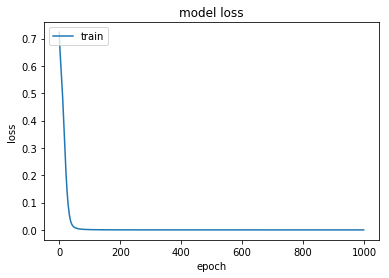

In [336]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

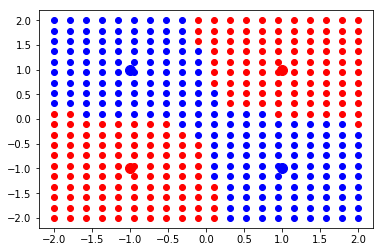

In [337]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros       = positions[predictions==0,:]
ones        = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [338]:
score = model.evaluate(X, Y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 255ms/step
Test loss: 3.4078320823e-06
Test accuracy: 1.0


# Problem 2

In Problem 1 I decided to implement a sequential neural network with five hidden layers and 25 units per layer. I made these choices because I felt very confident that I could achieve $100\%$ accuracy with far less layers/units per layer. As expected, the network was able to achieve $100\%$ accuracy on its first try. Though not very relevant in this problem due to its simplicity, I did use a seeded (for reproducibility) uniform Glorot initialization for the weights and a constant $0.1$ initialization for the biases. For the output layer, I used a sigmoid activation function since that is ideal for a binary classification problem. Also due to the binary nature of this problem, I used binary cross-entropy (BCE) as the measure of error and optimized it (using Adam) according to its accuracy.

# Problem 3

In [520]:
neurons_per_layer = 2

In [521]:
# # Multi-layer net with ReLU hidden layer
model = Sequential()

model.add(Dense(units              = neurons_per_layer,
                input_dim          = 2,
                activation         = 'relu',
                kernel_initializer = glorot_uniform(seed = weight_seed),
                bias_initializer   = Constant(0.1)))

model.add(Dense(units      = 1,
                activation = 'sigmoid'))

model.compile(loss      = 'binary_crossentropy',
              optimizer = Adam(),
              metrics   = ['accuracy'])
#print(model.summary())

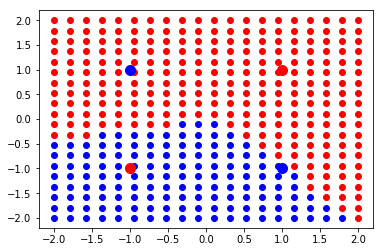

In [522]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros       = positions[predictions==0,:]
ones        = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [523]:
# Train it!
history = model.fit(X,
                    Y,
                    batch_size = 1,
                    epochs     = 3000,
                    verbose    = 0)

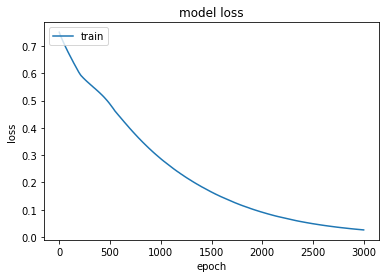

In [524]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

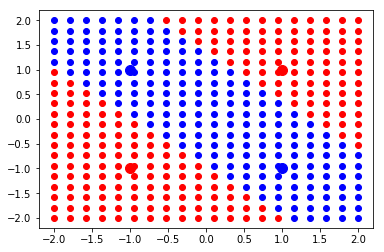

In [525]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:, 0]
zeros       = positions[predictions == 0, :]
ones        = positions[predictions == 1, :]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [526]:
score = model.evaluate(X, Y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 2s 379ms/step
Test loss: 0.0257592815906
Test accuracy: 1.0


# Problem 4

The choice of $\textit{ReLU}$ for the hidden units would normally increase the size of a network, since it uses deeper networks to solve problems. In the above case, though, I hit the theoretical minimum number of layers/nodes for this problem by using a very large number of epochs.

# Preparation For Problems 5 and 6

In [346]:

# Digits are zero through nine, so 10 classes
num_classes = 10
# input image dimension
img_dim     = 784
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_dim).astype('float16')
x_test  = x_test.reshape(x_test.shape[0], img_dim).astype('float16')
# Data normalization (0-255 is encoded as 0-1 instead)
x_train /= 255.0
x_test  /= 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


# Problem 5

In [363]:
neurons_per_layer = 200
model             = Sequential()
model.add(Dense(units              = neurons_per_layer,
                activation         = 'tanh',
                input_shape        = [x_train.shape[1]],
                kernel_initializer = glorot_uniform(seed = weight_seed),
                bias_initializer   = Constant(0.1)))

model.add(Dense(units              = neurons_per_layer,
                activation         = 'tanh',
                kernel_initializer = glorot_uniform(seed = weight_seed),
                bias_initializer   = Constant(0.1)))

model.add(Dense(units              = num_classes,
                kernel_initializer = glorot_uniform(seed = weight_seed),
                activation         = 'softmax'))
model.compile(loss                 = categorical_crossentropy,
              optimizer            = Adam(),
              metrics              = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 200)               157000    
_________________________________________________________________
dense_216 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_217 (Dense)            (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [364]:
#Train it!
history = model.fit(x_train,
                    y_train,
                    batch_size       = 400,
                    epochs           = 32,
                    verbose          = 1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/32
48000/48000 [==============================] - 7s 145us/step - loss: 0.4510 - acc: 0.8712 - val_loss: 0.2427 - val_acc: 0.9319
Epoch 2/32
48000/48000 [==============================] - 4s 82us/step - loss: 0.2194 - acc: 0.9363 - val_loss: 0.1880 - val_acc: 0.9470
Epoch 3/32
48000/48000 [==============================] - 4s 79us/step - loss: 0.1642 - acc: 0.9506 - val_loss: 0.1517 - val_acc: 0.9577
Epoch 4/32
48000/48000 [==============================] - 4s 80us/step - loss: 0.1297 - acc: 0.9624 - val_loss: 0.1287 - val_acc: 0.9642
Epoch 5/32
48000/48000 [==============================] - 4s 75us/step - loss: 0.1034 - acc: 0.9696 - val_loss: 0.1235 - val_acc: 0.9613
Epoch 6/32
48000/48000 [==============================] - 4s 81us/step - loss: 0.0848 - acc: 0.9750 - val_loss: 0.1094 - val_acc: 0.9666
Epoch 7/32
48000/48000 [==============================] - 4s 83us/step - loss: 0.0714 - acc: 0.9793 - val_loss: 0.0974 - val_ac

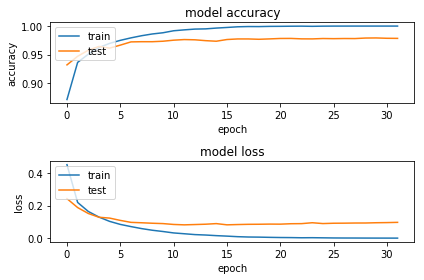

In [365]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [366]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0837878971403
Test accuracy: 0.9801


# Problem 6

In [321]:
neurons_per_layer = 300
model             = Sequential()
model.add(Dense(units              = neurons_per_layer,
                activation         = 'relu',
                input_shape        = [x_train.shape[1]],
                kernel_initializer = glorot_uniform(seed = weight_seed),
                bias_initializer   = Constant(0.1)))

model.add(Dense(units              = num_classes,
                kernel_initializer = glorot_uniform(seed = weight_seed),
                activation         = 'softmax'))
model.compile(loss                 = categorical_crossentropy,
              optimizer            = Adam(),
              metrics              = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_194 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_195 (Dense)            (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [322]:
#Train it!
history = model.fit(x_train,
                    y_train,
                    batch_size       = 200,
                    epochs           = 30,
                    verbose          = 1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 162us/step - loss: 0.3708 - acc: 0.8985 - val_loss: 0.1935 - val_acc: 0.9459
Epoch 2/30
48000/48000 [==============================] - 5s 104us/step - loss: 0.1654 - acc: 0.9530 - val_loss: 0.1411 - val_acc: 0.9622
Epoch 3/30
48000/48000 [==============================] - 5s 111us/step - loss: 0.1170 - acc: 0.9664 - val_loss: 0.1167 - val_acc: 0.9666
Epoch 4/30
48000/48000 [==============================] - 5s 110us/step - loss: 0.0869 - acc: 0.9754 - val_loss: 0.0979 - val_acc: 0.9721
Epoch 5/30
48000/48000 [==============================] - 5s 110us/step - loss: 0.0686 - acc: 0.9806 - val_loss: 0.0956 - val_acc: 0.9710
Epoch 6/30
48000/48000 [==============================] - 5s 112us/step - loss: 0.0534 - acc: 0.9857 - val_loss: 0.0874 - val_acc: 0.9746
Epoch 7/30
48000/48000 [==============================] - 5s 112us/step - loss: 0.0436 - acc: 0.9885 - val_loss: 0.0823 - 

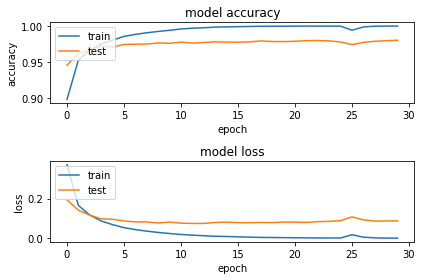

In [323]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [324]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0754311026974
Test accuracy: 0.9815


# Problem 7

As can be seen just looking at the graphs from Problems 5 and 6, there is not a significant difference between them, though there is a slight dip in accuracy around 25 epochs in the $\textit{ReLU}$ net. They are both very similar with respect to accuracy and loss $-$ though the $\tanh$ net did require roughly $16\%$ less parameters to acheive roughly the same accuracy as the $\textit{ReLU}$ net. The $\tanh$ net also required slightly more epochs to converge (32 vs 30).